In [2]:
import torch
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
cd Downloads/

/Users/preethambindela/Downloads


In [4]:
words = open('indian_names.txt','r').read().splitlines()

In [64]:
def clean_names(words):
    # Dictionary to map special characters to regular ones
    char_map = {
        'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'a',
        'ç': 'c',
        'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e',
        'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
        'ñ': 'n',
        'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o',
        'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u',
        'ý': 'y', 'ÿ': 'y',
        'š': 's', 'ž': 'z', 'ß': 's',
        # Add uppercase variants
        'À': 'a', 'Á': 'a', 'Â': 'a', 'Ã': 'a', 'Ä': 'a', 'Å': 'a', 'Æ': 'a',
        'Ç': 'c',
        'È': 'e', 'É': 'e', 'Ê': 'e', 'Ë': 'e',
        'Ì': 'i', 'Í': 'i', 'Î': 'i', 'Ï': 'i',
        'Ñ': 'n',
        'Ò': 'o', 'Ó': 'o', 'Ô': 'o', 'Õ': 'o', 'Ö': 'o', 'Ø': 'o',
        'Ù': 'u', 'Ú': 'u', 'Û': 'u', 'Ü': 'u',
        'Ý': 'y',
        'Š': 's', 'Ž': 'z'
    }
    
    cleaned_words = []
    
    for word in words:
        # First convert special characters to regular ones
        cleaned = word.lower()
        for special_char, regular_char in char_map.items():
            cleaned = cleaned.replace(special_char, regular_char)
        
        # Then keep only a-z characters
        cleaned = ''.join(char for char in cleaned if char in 'abcdefghijklmnopqrstuvwxyz')
        
        # Only add non-empty strings to the result
        if cleaned:
            cleaned_words.append(cleaned)
            
    return cleaned_words

# Example usage:
words = [
    "rohit",
    "chandu ikbal @ akbar",
    "‡§â‡§¶‡§Ø‡§≤‡§æ‡§≤",  # Special characters will be removed
    "neeraj kumar",
    "sürender",  # ü will become u
    "nitín",    # í will become i
    "shishram yadav",
    "dharmveer",
    "harendra",
    "shish ram",
    "rohtash saini",
    "rameshwer urf kallu",
    "tofik",
    "‡§Ü‡§∏‡§ø‡§´",
    "adán",     # á will become a
    "sanjay @ gindo",
    "ramdhan",
    "kirshan pal",
    "sonu",
    "ashrfi",
    "raja"
]

def remove_surnames(names):
    # Common surname suffixes/indicators for different communities
    surname_indicators = [
        'kumar', 'singh', 'yadav', 'sharma', 'verma', 'gupta', 'saini', 'pal',
        'khan', 'mohammed', 'mohammad', 'ahmad', 'ansari', 
        'reddy', 'naidu', 'rao',
        'kaur', 'sahni', 'sethi',
        'das', 'devi', 'kumari',
        # Add more surnames as needed
    ]
    
    cleaned_names = []
    
    for full_name in names:
        # Convert to lowercase and split into words
        name_parts = full_name.lower().split()
        
        # Keep only the first part if any other part matches surname indicators
        first_name = name_parts[0]
        
        # Clean the first name to keep only a-z characters
        cleaned_name = ''.join(char for char in first_name if char.isalpha())
        
        if cleaned_name:  # Only add if name is not empty
            cleaned_names.append(cleaned_name)
    
    return cleaned_names

# Example usage:
names = [
    "rohit sharma",
    "chandu ikbal khan",
    "neeraj kumar",
    "surender singh",
    "nitin verma",
    "shishram yadav",
    "dharmveer gupta",
    "harendra saini",
    "shish ram",
    "rohtash saini",
    "rameshwer urf kallu",
    "tofik mohammed",
    "adan ahmad",
    "sanjay kumar",
    "ramdhan singh",
    "kirshan pal",
    "sonu",  # single names will remain as is
    "ashrfi devi",
    "raja reddy"
]

cleaned_names = remove_surnames(words)
words = clean_names(cleaned_names)

In [65]:
words[:1000]

['rohit',
 'chandu',
 'aoa',
 'neeraj',
 'surender',
 'nitin',
 'shishram',
 'dharmveer',
 'harendra',
 'shish',
 'rohtash',
 'rameshwer',
 'tofik',
 'uo',
 'adan',
 'sanjay',
 'ramdhan',
 'kirshan',
 'sonu',
 'ashrfi',
 'raja']

In [66]:
words[:3]

['rohit', 'chandu', 'aoa']

In [67]:
len(words)

21

In [68]:
chars = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i,s in enumerate(chars)}
s_to_i['.'] = 0
i_to_s = {i:s for s,i in s_to_i.items()}
print(i_to_s)

{1: 'a', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'h', 7: 'i', 8: 'j', 9: 'k', 10: 'm', 11: 'n', 12: 'o', 13: 'r', 14: 's', 15: 't', 16: 'u', 17: 'v', 18: 'w', 19: 'y', 0: '.'}


In [69]:
i_to_s = {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 
 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 
 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}

In [70]:
context = [1,2,3,4,52]
context[1:]

[2, 3, 4, 52]

In [71]:
block_size = 3
X, Y = [],[]

for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = s_to_i[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(i_to_s[i] for i in context),  '---->', i_to_s[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [72]:
def build_dataset(words):
    block_size = 3
    X, Y = [],[]
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = s_to_i[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train, Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

torch.Size([108, 3]) torch.Size([108])
torch.Size([19, 3]) torch.Size([19])
torch.Size([18, 3]) torch.Size([18])


In [73]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([145, 3]), torch.int64, torch.Size([145]), torch.int64)

In [74]:
X

tensor([[ 0,  0,  0],
        [ 0,  0, 13],
        [ 0, 13, 12],
        [13, 12,  6],
        [12,  6,  7],
        [ 6,  7, 15],
        [ 0,  0,  0],
        [ 0,  0,  2],
        [ 0,  2,  6],
        [ 2,  6,  1],
        [ 6,  1, 11],
        [ 1, 11,  3],
        [11,  3, 16],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 12],
        [ 1, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 11],
        [ 0, 11,  4],
        [11,  4,  4],
        [ 4,  4, 13],
        [ 4, 13,  1],
        [13,  1,  8],
        [ 0,  0,  0],
        [ 0,  0, 14],
        [ 0, 14, 16],
        [14, 16, 13],
        [16, 13,  4],
        [13,  4, 11],
        [ 4, 11,  3],
        [11,  3,  4],
        [ 3,  4, 13],
        [ 0,  0,  0],
        [ 0,  0, 11],
        [ 0, 11,  7],
        [11,  7, 15],
        [ 7, 15,  7],
        [15,  7, 11],
        [ 0,  0,  0],
        [ 0,  0, 14],
        [ 0, 14,  6],
        [14,  6,  7],
        [ 6,  7, 14],
        [ 7, 14,  6],
        [1

In [75]:
C = torch.randn((27,2))

In [76]:
C

tensor([[-1.3031, -0.1959],
        [ 0.3200, -0.0493],
        [ 1.2690, -1.0955],
        [ 2.1676, -0.2933],
        [-0.4778, -0.9977],
        [-0.4522, -0.1421],
        [-0.9581,  0.2399],
        [ 1.5469,  1.4730],
        [ 0.2045,  0.7112],
        [-1.6229, -2.4288],
        [ 0.1347,  0.3746],
        [ 0.2615, -0.1633],
        [ 0.4120,  0.4608],
        [-0.0767,  0.9690],
        [ 0.4091,  0.2110],
        [-0.3937,  0.0626],
        [ 1.3333,  0.2957],
        [-1.6779,  0.1684],
        [ 0.4954, -0.3556],
        [ 0.6914, -1.6222],
        [ 0.5591, -0.5024],
        [ 0.0956,  0.7330],
        [ 0.4277, -0.2221],
        [-0.0567,  0.1556],
        [-1.3390,  1.0440],
        [-0.8887, -0.1927],
        [-1.5369,  2.5845]])

In [77]:
C[X]

tensor([[[-1.3031, -0.1959],
         [-1.3031, -0.1959],
         [-1.3031, -0.1959]],

        [[-1.3031, -0.1959],
         [-1.3031, -0.1959],
         [-0.0767,  0.9690]],

        [[-1.3031, -0.1959],
         [-0.0767,  0.9690],
         [ 0.4120,  0.4608]],

        [[-0.0767,  0.9690],
         [ 0.4120,  0.4608],
         [-0.9581,  0.2399]],

        [[ 0.4120,  0.4608],
         [-0.9581,  0.2399],
         [ 1.5469,  1.4730]],

        [[-0.9581,  0.2399],
         [ 1.5469,  1.4730],
         [-0.3937,  0.0626]],

        [[-1.3031, -0.1959],
         [-1.3031, -0.1959],
         [-1.3031, -0.1959]],

        [[-1.3031, -0.1959],
         [-1.3031, -0.1959],
         [ 1.2690, -1.0955]],

        [[-1.3031, -0.1959],
         [ 1.2690, -1.0955],
         [-0.9581,  0.2399]],

        [[ 1.2690, -1.0955],
         [-0.9581,  0.2399],
         [ 0.3200, -0.0493]],

        [[-0.9581,  0.2399],
         [ 0.3200, -0.0493],
         [ 0.2615, -0.1633]],

        [[ 0.3200, -0

In [78]:
C[X].shape

torch.Size([145, 3, 2])

In [79]:
X.shape, Y.shape

(torch.Size([145, 3]), torch.Size([145]))

In [80]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.rand((30 ,200), generator = g)
b1 = torch.rand(200, generator = g)
W2 = torch.rand((200,27), generator = g)
b2 = torch.rand(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [81]:
sum(p.nelement() for p in parameters)

11897

In [82]:
for p in parameters :
    p.requires_grad = True

In [83]:
C[X_train].shape

torch.Size([108, 3, 10])

In [84]:
 for i in range(10):
    # forward propagation 
    
    emb = C[X_train] #shape = 32*3*2
    emb = emb.view(-1,30) #shape = 32*6
    h = torch.tanh(emb @ W1 + b1) #shape = 32*100
    logits = h @ W2 + b2 #shape = 32*27
    
    # loss 1
    # counts = logits.exp()
    # prob = counts/counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    
    # loss 2 
    loss = F.cross_entropy(logits, Y_train)
    
    # backward propagation 
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters: 
        p.data += -0.1 * p.grad

print(loss.item())

3.022218942642212


In [85]:
lre =  torch.linspace(-3, 0, 100000)
lrs =  10**lre

In [86]:
lri = []
loss_i = []
step_i = []

for i in range(50000):
    
    # it takes lot of time to process 200000 words, thats why we create mini batches.
    # mini batch size = 32
    # minibatch construction 
    ix = torch.randint(0, X_train.shape[0],(32,))
    
    # forward propagation 
    
    emb = C[X_train[ix]] #shape = 32*3*2
    emb = emb.view(-1,30) #shape = 32*6
    h = torch.tanh(emb @ W1 + b1) #shape = 32*100
    logits = h @ W2 + b2 #shape = 32*27
    
    # loss 1
    # counts = logits.exp()
    # prob = counts/counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    
    # loss 2 
    loss = F.cross_entropy(logits, Y_train[ix])
    
    # backward propagation 
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.009
    for p in parameters: 
        p.data += -lr * p.grad

    step_i.append(i)
    #lri.append(lre[i])
    loss_i.append(loss.log().item())
    
print(loss.item())

0.22940698266029358


### To Gain more accuracy divide dataset into train, validation and test sets 

In [87]:
emb = C[X_val]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@W2+b2
loss = F.cross_entropy(logits, Y_val)
loss

tensor(6.8416, grad_fn=<NllLossBackward0>)

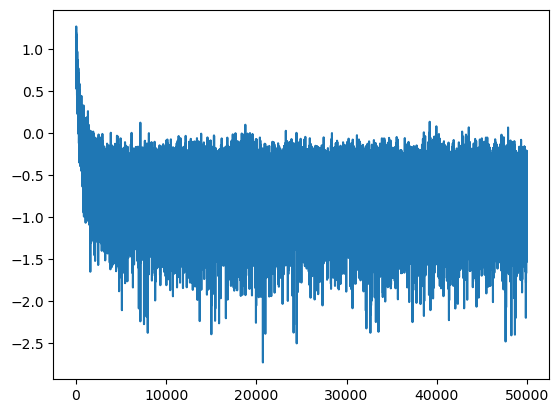

In [88]:
plt.plot(step_i, loss_i)

### GENERATING NAMES, OUR MAIN OBJECTIVE 

In [89]:
g = torch.Generator().manual_seed(2146483657)

for i in range(20):
    out = []
    context = [0] * block_size
    while True: 
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2 
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(i_to_s[i] for i in out))

nfgnfmeg.
olegi.
anfmeg.
maj.
anfmaj.
majcfak.
nakhas.
mlfoanfmeg.
anf.
kgogk.
majdnfrdm.
nlkp.
mlfoanf.
nfgnf.
majdnfrdm.
igmnfak.
nakhas.
mlfoanf.
anf.
majcfak.
